<a href="https://colab.research.google.com/github/hannahscha/cheg472/blob/main/worksheet_5_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

## Dataset Exploration

Viewing Dataset

In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual path to your file
df = pd.read_excel('/content/Hydrogen storage dataset.xlsx') # Use read_excel for .xlsx files

# Display the first 5 rows of the DataFrame
df.head()

# Get some basic information about the DataFrame
df.info()

# Describe the numerical features of the DataFrame
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         540 non-null    object
 1   Input features     541 non-null    object
 2   Unnamed: 2         540 non-null    object
 3   Unnamed: 3         540 non-null    object
 4   Unnamed: 4         540 non-null    object
 5   Unnamed: 5         541 non-null    object
 6   Unnamed: 6         540 non-null    object
 7   Output parameters  424 non-null    object
 8   Unnamed: 8         152 non-null    object
dtypes: object(9)
memory usage: 38.2+ KB


,Unnamed: 0,Input features,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Output parameters,Unnamed: 8
count,540,541.0000,540.000000,540.0,540.00,541,540.000000,424.000000,152
unique,21,23.0000,22.000000,21.0,21.00,8,522.000000,378.000000,152
top,Multi-walled carbon nanotube functionalized wi...,3.6696,62.089987,225.6,1.41,77,0.608365,0.022436,Hydrogen desorption (wt%)
freq,88,88.0000,88.000000,88.0,88.00,195,3.000000,11.000000,1


Fixing Problems in Dataset

In [ ]:
# prompt: the 3rd row starts the numerical data, the first two rows are descriptions of the data, remember this in the cde variables

import pandas as pd
# Dataset Exploration

# Replace 'your_file.xlsx' with the actual path to your file
df = pd.read_excel('/content/Hydrogen storage dataset.xlsx') # Use read_excel for .xlsx files

# Extract the header information (first two rows)
header_rows = df.iloc[:2]

# Extract the numerical data starting from the 3rd row
numerical_data = df.iloc[2:]

# Display the header rows
print("Header Rows:\n", header_rows)

# Display the numerical data
print("\nNumerical Data:\n", numerical_data.head())

# Get some basic information about the numerical data DataFrame
numerical_data.info()

# Describe the numerical features of the numerical data DataFrame
numerical_data.describe()


Header Rows:
       Unnamed: 0                                     Input features  \
0            NaN  Functionalized carbonaceous nanomaterial prope...   
1  Material name                          Average crystal size (nm)   

               Unnamed: 2                Unnamed: 3           Unnamed: 4  \
0                     NaN                       NaN                  NaN   
1  Crystalinity index (%)   BET surface area (m²/g)  Pore volume (cm³/g)   

                  Unnamed: 5      Unnamed: 6  \
0  Thermodynamic parameters              NaN   
1            Temperature (K)  Pressure (bar)   

                  Output parameters                 Unnamed: 8  
0                               NaN                        NaN  
1  Hydrogen uptake/adsorption (wt%)  Hydrogen desorption (wt%)  

Numerical Data:
                                           Unnamed: 0 Input features  \
2  Carbon nanotube functionalized with HNO3 at 80 °C       3.780644   
3  Carbon nanotube functionalized with HNO3

,Unnamed: 0,Input features,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Output parameters,Unnamed: 8
count,539,539.0000,539.000000,539.0,539.00,539,539,423.000000,151.000000
unique,20,21.0000,21.000000,20.0,20.00,6,521,377.000000,151.000000
top,Multi-walled carbon nanotube functionalized wi...,3.6696,62.089987,225.6,1.41,77,0,0.022436,0.011229
freq,88,88.0000,88.000000,88.0,88.00,195,3,11.000000,1.000000


Fix headings

In [ ]:
# prompt: fix unnamed titles to the ones in the first two rows

new_header = df.iloc[0]  # grab the first row for the header
df = df[1:] # take the data less the header row
df.columns = new_header # set the header row as the df header
new_header2 = df.iloc[0]
df = df[1:]
df.columns = new_header2
df.head()


1,Material name,Average crystal size (nm),Crystalinity index (%),BET surface area (m²/g),Pore volume (cm³/g),Temperature (K),Pressure (bar),Hydrogen uptake/adsorption (wt%),Hydrogen desorption (wt%)
2,Carbon nanotube functionalized with HNO3 at 80 °C,3.780644,82.394903,125.2,1.018,298,0,0,0.011229
3,Carbon nanotube functionalized with HNO3 at 80 °C,3.780644,82.394903,125.2,1.018,298,4.89664,0.013857,NaN
4,Carbon nanotube functionalized with HNO3 at 80 °C,3.780644,82.394903,125.2,1.018,298,10.0696,0.018396,0.027713
5,Carbon nanotube functionalized with HNO3 at 80 °C,3.780644,82.394903,125.2,1.018,298,20.0167,0.032969,0.040136
6,Carbon nanotube functionalized with HNO3 at 80 °C,3.780644,82.394903,125.2,1.018,298,29.8414,0.04372,0.049454


## Data Inspection

Chacking for missing values

In [ ]:
# prompt: check for mising values inside of dataset and forward fill missing values and confirm filled values

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Forward fill missing values
df_filled = df.fillna(method='ffill')

# Confirm filled values
missing_values_filled = df_filled.isnull().sum()
print("\nMissing values after forward fill:\n", missing_values_filled)

# You can also use other methods for filling missing values like 'bfill' (backward fill) or 'mean' (fill with mean value)



Missing values:
 1
Material name                         0
Average crystal size (nm)             0
Crystalinity index (%)                0
 BET surface area (m²/g)              0
Pore volume (cm³/g)                   0
Temperature (K)                       0
Pressure (bar)                        0
Hydrogen uptake/adsorption (wt%)    116
Hydrogen desorption (wt%)           388
dtype: int64

Missing values after forward fill:
 1
Material name                       0
Average crystal size (nm)           0
Crystalinity index (%)              0
 BET surface area (m²/g)            0
Pore volume (cm³/g)                 0
Temperature (K)                     0
Pressure (bar)                      0
Hydrogen uptake/adsorption (wt%)    0
Hydrogen desorption (wt%)           0
dtype: int64


<ipython-input-9-58f71dc0e384>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill')


Check data types

In [ ]:
# prompt: check data types

print(df.dtypes)


1
Material name                       object
Average crystal size (nm)           object
Crystalinity index (%)              object
 BET surface area (m²/g)            object
Pore volume (cm³/g)                 object
Temperature (K)                     object
Pressure (bar)                      object
Hydrogen uptake/adsorption (wt%)    object
Hydrogen desorption (wt%)           object
dtype: object


In [ ]:
# prompt: convert strings to folats

import pandas as pd
# Select columns with object (string) data type
object_columns = df.select_dtypes(include=['object']).columns

# Convert string columns to float, handling errors
for column in object_columns:
  try:
    df[column] = pd.to_numeric(df[column], errors='coerce')
  except ValueError:
    print(f"Could not convert column '{column}' to float.")

# Print the data types after conversion
print(df.dtypes)


1
Material name                       float64
Average crystal size (nm)           float64
Crystalinity index (%)              float64
 BET surface area (m²/g)            float64
Pore volume (cm³/g)                 float64
Temperature (K)                     float64
Pressure (bar)                      float64
Hydrogen uptake/adsorption (wt%)    float64
Hydrogen desorption (wt%)           float64
dtype: object


Statistics

In [ ]:
# prompt: calculate the statistics of the dataset including mean median and standard deviation

# Calculate statistics for numerical columns
numerical_stats = df.describe()

print(numerical_stats)


1      Material name  Average crystal size (nm)  Crystalinity index (%)  \
count            0.0                 539.000000              539.000000   
mean             NaN                   8.166266               49.162962   
std              NaN                   4.560454               16.764251   
min              NaN                   2.977754               18.900143   
25%              NaN                   3.669600               36.381961   
50%              NaN                   9.032235               52.881608   
75%              NaN                  12.543453               62.089987   
max              NaN                  15.712170               82.394903   

1       BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
count                539.000000           539.000000       539.000000   
mean                 258.195065             0.838367       246.267191   
std                  214.466418             0.609617       152.823071   
min                   39.200000 

## Data Visualization

Pair wise plot

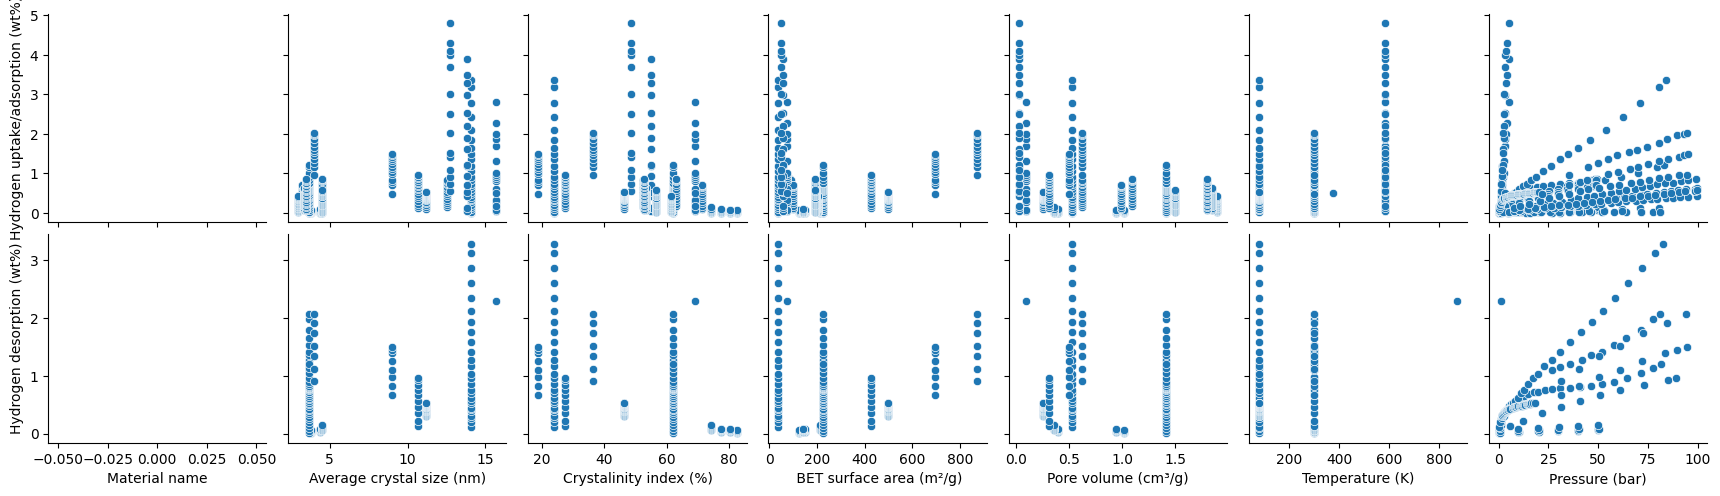

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select the target variables and features for the pair plot
target_vars = ['Hydrogen uptake/adsorption (wt%)', 'Hydrogen desorption (wt%)']
features = df.columns.drop(target_vars)

# Convert columns to numeric, handling errors by coercing to NaN
for col in df.columns:
    # If the column is an object type (likely string), try converting to numeric
    if df[col].dtype == 'object':
        # Remove leading/trailing spaces and replace no-break spaces with regular spaces
        # This line now includes replacing regular non-breaking spaces (U+00A0) as well
        df[col] = df[col].str.strip().str.replace('\xa0', ' ').str.replace(u'\u202f', ' ').str.replace(u'\u00A0', ' ')
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Create the pair plot
sns.pairplot(df, x_vars=features, y_vars=target_vars, diag_kind='kde')
plt.show()

# Part 2

## Data Preprocessing

In [ ]:
import pandas as pd
# Check for missing values again after potential conversions
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values (e.g., fill with mean, median, or drop rows/columns)
# Example: Fill missing values with the mean of the respective columns
# If a column is numeric, fill with mean, otherwise fill with the most frequent value
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])  # Fill with most frequent value


# One-hot encode categorical variables (if any)
# Check if any columns are of type 'object' (likely categorical)
categorical_cols = df.select_dtypes(include=['object']).columns

# If any categorical columns are identified, proceed with one-hot encoding
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)


# Display the updated DataFrame with handled missing values and one-hot encoded features
print(df.head())

Missing values:
 1
Material name                       539
Average crystal size (nm)             0
Crystalinity index (%)                0
 BET surface area (m²/g)              0
Pore volume (cm³/g)                   0
Temperature (K)                       0
Pressure (bar)                        0
Hydrogen uptake/adsorption (wt%)      0
Hydrogen desorption (wt%)             0
dtype: int64
1  Material name  Average crystal size (nm)  Crystalinity index (%)  \
2            NaN                   3.780644               82.394903   
3            NaN                   3.780644               82.394903   
4            NaN                   3.780644               82.394903   
5            NaN                   3.780644               82.394903   
6            NaN                   3.780644               82.394903   

1   BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
2                     125.2                1.018            298.0   
3                     125.2                

In [ ]:
# prompt: to prepare for machine learning Split the dataset into training and testing sets (typically 80/20) and define these apprepriately

from sklearn.model_selection import train_test_split

# Define your target variable (y) and features (X)
y = df['Hydrogen uptake/adsorption (wt%)']  # Replace with your actual target variable
X = df.drop(['Hydrogen uptake/adsorption (wt%)', 'Hydrogen desorption (wt%)'], axis=1)  # Replace with your actual features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (431, 7)
X_test shape: (108, 7)
y_train shape: (431,)
y_test shape: (108,)


## Model Selection

In [ ]:
# prompt: Choose a suitable machine learning algorithm. Try three different models, Random forest, decision tree and XGBoost.
# Implement the model using libraries such as Scikit-learn or TensorFlow.

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)


# Evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

rf_mse, rf_r2 = evaluate_model(y_test, rf_predictions)
dt_mse, dt_r2 = evaluate_model(y_test, dt_predictions)
xgb_mse, xgb_r2 = evaluate_model(y_test, xgb_predictions)


print("Random Forest:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")

print("\nDecision Tree:")
print(f"Mean Squared Error: {dt_mse}")
print(f"R-squared: {dt_r2}")

print("\nXGBoost:")
print(f"Mean Squared Error: {xgb_mse}")
print(f"R-squared: {xgb_r2}")


Random Forest:
Mean Squared Error: 0.11512795723198661
R-squared: 0.39740174107210025

Decision Tree:
Mean Squared Error: 0.15282024415148812
R-squared: 0.2001142444570565

XGBoost:
Mean Squared Error: 0.14009525631558092
R-squared: 0.26671887897988567


## Training the Model

In [ ]:
# prompt: Train your model on the training dataset.

# You've already trained the models in the provided code.
# Here's how it's done, in case you want to change the model or parameters:


# Choose your preferred model (e.g., Random Forest)
model = RandomForestRegressor(random_state=42)  # Or another model like xgb_model or dt_model

# Train the model on the training data
model.fit(X_train, y_train)

# Now your model is trained and ready for evaluation and prediction on the test data


RandomForestRegressor(random_state=42)

## Model Evaluation

In [ ]:
# prompt: Evaluate your model using the test dataset.
# Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² score to assess model performance.
# print what these numbers in specific tell you about this specific model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have your trained model and X_test, y_test

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

print("\nInterpretation of the metrics:")
print(f"- MAE: On average, the model's predictions are off by {mae} wt% compared to the actual hydrogen uptake.")
print(f"- MSE: The average squared difference between predicted and actual hydrogen uptake is {mse} (wt%)². This metric is sensitive to outliers.")
print(f"- RMSE: The average difference between predicted and actual hydrogen uptake is {rmse} wt%. This is similar to MAE but gives more weight to larger errors.")
print(f"- R²: The model explains {r2:.2%} of the variance in hydrogen uptake. A higher R² score indicates a better fit.")




Mean Absolute Error (MAE): 0.16513512933278598
Mean Squared Error (MSE): 0.11512795723198661
Root Mean Squared Error (RMSE): 0.3393051093514311
R-squared (R²): 0.39740174107210025

Interpretation of the metrics:
- MAE: On average, the model's predictions are off by 0.16513512933278598 wt% compared to the actual hydrogen uptake.
- MSE: The average squared difference between predicted and actual hydrogen uptake is 0.11512795723198661 (wt%)². This metric is sensitive to outliers.
- RMSE: The average difference between predicted and actual hydrogen uptake is 0.3393051093514311 wt%. This is similar to MAE but gives more weight to larger errors.
- R²: The model explains 39.74% of the variance in hydrogen uptake. A higher R² score indicates a better fit.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Feature Importance Analysis

Feature Importances (Permutation Importance):
                     feature  importance       std
6             Pressure (bar)    1.288285  0.411312
5            Temperature (K)    1.141798  0.198903
4        Pore volume (cm³/g)    0.776152  0.415666
0              Material name    0.000000  0.000000
1  Average crystal size (nm)   -0.066505  0.036627
3    BET surface area (m²/g)   -0.096541  0.049561
2     Crystalinity index (%)   -0.116196  0.039342

Discussion and Implications:
- The features with the highest permutation importance scores are the most influential in predicting hydrogen uptake/adsorption.
- These features can be considered the key factors affecting hydrogen storage capacity.
- Understanding the importance of these features can help in material design and selection for improved hydrogen storage materials.
- Further investigation can be done by studying the relationship between these important features and hydrogen storage capacity.


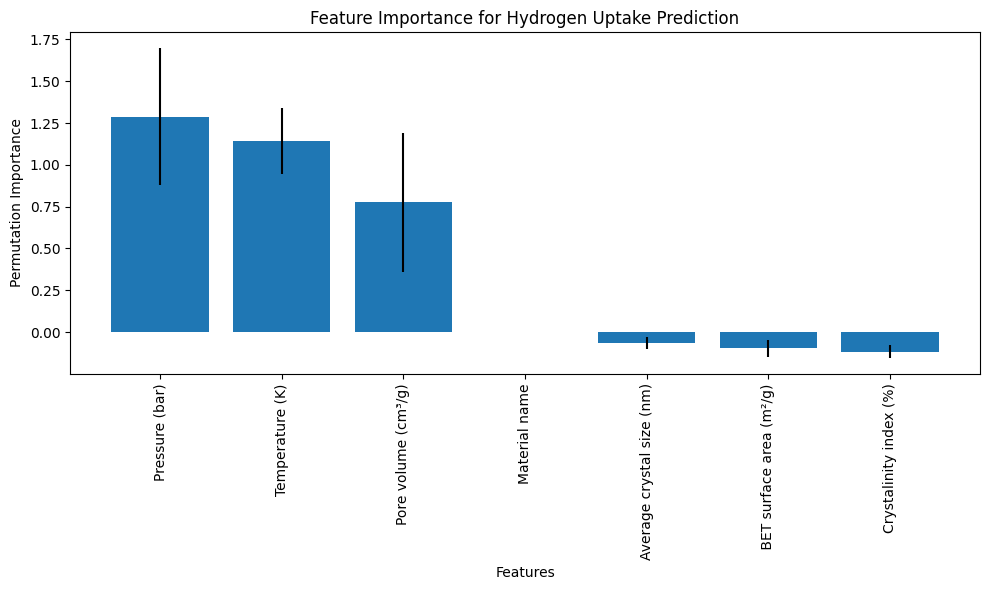

In [ ]:
# prompt: Use feature importance techniques (e.g., permutation importance or SHAP values) to determine which input features significantly influence hydrogen storage capacity.
# Discuss and print the implications of your findings.

import pandas as pd
import matplotlib.pyplot as plt
# Feature Importance Analysis using Permutation Importance

from sklearn.inspection import permutation_importance

# Assuming your model is named 'model' (e.g., RandomForestRegressor)
# and X_test, y_test are defined

# Calculate permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importances and their standard deviations
importances = result.importances_mean
std = result.importances_std

# Create a DataFrame for easier viewing
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances, 'std': std})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Print the feature importances
print("Feature Importances (Permutation Importance):")
print(feature_importance_df)


# Discussion and Implications of Findings

print("\nDiscussion and Implications:")
print("- The features with the highest permutation importance scores are the most influential in predicting hydrogen uptake/adsorption.")
print("- These features can be considered the key factors affecting hydrogen storage capacity.")
print("- Understanding the importance of these features can help in material design and selection for improved hydrogen storage materials.")
print("- Further investigation can be done by studying the relationship between these important features and hydrogen storage capacity.")


# Optional: Visualize Feature Importance
# You can create a bar plot to visualize the feature importances.
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'], yerr=feature_importance_df['std'])
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Feature Importance for Hydrogen Uptake Prediction')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

